In [1]:
#Import Libraries
import pandas as pd
from fpdf import FPDF
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import dataframe_image as dfi

###  Dataset Reference: KAGGLE (https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo)

In [2]:
#Read in the medals data
medals_info = pd.read_excel("archive/Medals.xlsx")

c:\users\kalwad.piyusha\appdata\local\programs\python\python39\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
medals_info

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [4]:
#Define color scheme to color the values in the dataframe
def color_pos_neg_value(value):
    if value < 10:
        color = 'red'
    elif (value >= 10) and (value < 30):
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

#Apply styling : Applymap to apply the value wise coloring on Gold, Silver and Bonze columns
styled_medals_info = medals_info.style.format({'Gold': "{:.0f}", 
                                              'Silver': "{:.0f}",
                                              'Bronze': "{:.0f}", 
                                              'Total': "{:.0f}", 
                                              'Rank by Total': "{:.0f}"}).hide_index().bar(subset = ['Total',], color='steelblue').applymap(color_pos_neg_value, subset = ['Gold', 'Bronze', 'Silver'])

In [5]:
styled_medals_info

Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
1,United States of America,39,41,33,113,1
2,People's Republic of China,38,32,18,88,2
3,Japan,27,14,17,58,5
4,Great Britain,22,21,22,65,4
5,ROC,20,28,23,71,3
6,Australia,17,7,22,46,6
7,Netherlands,10,12,14,36,9
8,France,10,12,11,33,10
9,Germany,10,11,16,37,8
10,Italy,10,10,20,40,7


In [6]:
#Export as an image using dataframe image library
dfi.export(styled_medals_info, 'pictures/styled_df1.png')

In [7]:
#Plot the country-wise medal count
def generate_matplotlib_barplot(df, filename):
    
    #Create subplot and bar
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12,4)
    ax.plot(medals_info['Team/NOC'].values, medals_info['Total'].values, color="#E63946", marker = "o")
    
    #Give titles
    ax.set_title('Country-wise Total Medal Count', fontweight='bold')
    
    #Set xticklabels
    ax.set_xticklabels(medals_info['Team/NOC'].values, rotation=90, fontsize=6.5)
    plt.xticks(medals_info['Team/NOC'].values) 
    
    #Set y label
    ax.set_ylabel('Total Medal Count', fontsize=6)
    
    #Save the plot
    plt.savefig(filename, dpi=80, bbox_inches='tight', pad_inches=0)
    
    plt.show()

C:\Users\KALWAD~1.PIY\AppData\Local\Temp/ipykernel_19696/1087317313.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals_info['Team/NOC'].values, rotation=90, fontsize=6.5)


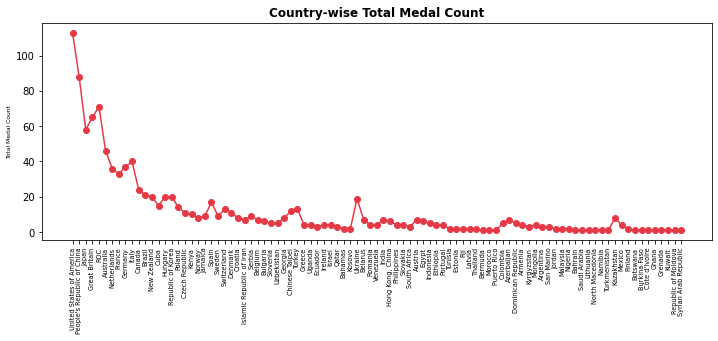

In [8]:
#Export as an image
generate_matplotlib_barplot(medals_info, 'pictures/Total_Medal_Count.png')

In [9]:
#Add utility functions - optional
def create_letterhead(pdf, WIDTH):
    pdf.image('pictures/Tokyo_2021.jpg',0,0, w=300)
    
def create_title(title, pdf):
    
    #main title
    pdf.set_font('Helvetica', 'b', 20)
    pdf.ln(10)
    pdf.write(5,title)
    pdf.ln(20)
    
    
    #Add date of report
    pdf.set_font('Helvetica', '', 14)
    pdf.set_text_color(r=128,g=128,b=128)
    today=time.strftime("%d/%m/%Y")
    pdf.write(4,f'{today}')
    
    
    #Line break
    pdf.ln(10)
    
    
def write_to_pdf(pdf,words):
    
    #Text color, font_size, and font-type
    
    pdf.set_text_color(r=0,g=0,b=0)
    pdf.set_font('Helvetica', '', 12)
    pdf.write(5, words)
    
    
    
#Footer function
class PDF(FPDF):
        def footer(self):
            self.set_y(-15)
            self.set_font('Helvetica', 'I',8)
            self.set_text_color(128)
            self.cell(0,10,'Page ' + str(self.page_no()), 0,0, 'C')   

In [10]:
#Read in the gender wise dataset of each sporting event
entries_gender = pd.read_excel("archive/EntriesGender.xlsx")

In [11]:
entries_gender

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288
8,Beach Volleyball,48,48,96
9,Boxing,102,187,289


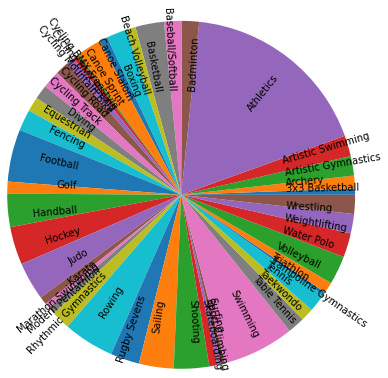

In [12]:
#Female participation - Sport wise
plt.pie(entries_gender['Female'], labels=entries_gender['Discipline'], radius=2, labeldistance=0.6, rotatelabels=45)
mpl.rcParams['font.size'] = 8
plt.savefig('pictures/Female_Sports_Wise_Distribution.png', format='png',  dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()

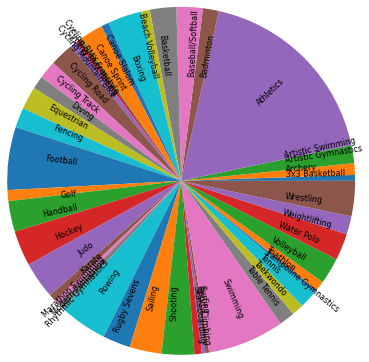

In [13]:
#Male participation - Sport wise
plt.pie(entries_gender['Male'], labels=entries_gender['Discipline'], radius=2, labeldistance=0.6, rotatelabels=45)
mpl.rcParams['font.size'] = 8
plt.savefig('pictures/Male_Sports_Wise_Distribution.png', format='png',  dpi=75, bbox_inches='tight', pad_inches=0)
plt.show()

In [14]:
#Global Variables - define the layout of PDF report page by page
TITLE = "Olympics Report 2021 - KAGGLE"
WIDTH = 210
HEIGHT = 297

pdf = PDF() #A4 size = 210mm * 297mm

#Add the pages in the pdf one by one

#First page - Background of Tokyo Olympics Image
'''Add page '''
pdf.add_page('A4')
''' Add letterhead and title '''
create_letterhead(pdf, WIDTH)
create_title(TITLE, pdf)

#Second Page - Scatter plot of country-wise Medal Count
pdf.add_page('L')
'''Add some words to PDF'''
pdf.set_font('Arial', 'B',14)
pdf.set_text_color(0,0,255)
pdf.set_left_margin(15)
pdf.set_right_margin(10)
pdf.write(5,"MEDAL STATISTICS FOR TOKYO OLYMPICS 2021")
pdf.ln(30)
pdf.image("pictures/Total_Medal_Count.png",8,30)

#Second Page - Pie chart of Male and Female Participation in Olympics
'''Female participation in Olympics'''
pdf.add_page('L')
'''Add some words to PDF'''
pdf.set_font('Arial', 'B',14)
pdf.set_text_color(0,0,255)
pdf.set_left_margin(20)
pdf.set_right_margin(10)
pdf.write(5,"FEMALE PARTICIPATION IN OLYMPICS 2021")
pdf.set_left_margin(165)
pdf.set_right_margin(0)
pdf.write(5,"MALE PARTICIPATION IN OLYMPICS 2021")
pdf.ln(80)
pdf.image("pictures/Female_Sports_Wise_Distribution.png",5,20)


'''Male participation in Olympics'''
pdf.ln(80)
pdf.image("pictures/Male_Sports_Wise_Distribution.png",150,20)

In [15]:
#Write the PDF report 
pdf.output("Tokyo_Olympics_2021.pdf", 'F')

''